In [9]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)



# Random boundary

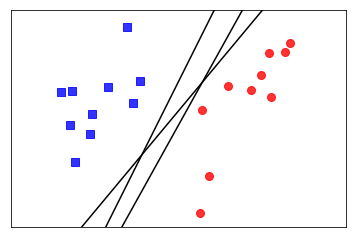

In [10]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(22)
from matplotlib.backends.backend_pdf import PdfPages
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((X0, X1), axis = 0)

y = np.concatenate((np.ones(N), -np.ones(N)), axis = 0)


# plot points
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
# plt.plot([3.5], [2.5], 'k^', markersize = 10, alpha = .8)
plt.axis('equal')
# axis limits
plt.ylim(0, 3)
plt.xlim(2, 4)

# fill region colors
x1 = np.arange(-10,10,0.1)
y1 = 2*x1 - 4
y2 = 1.8*x1 -4
y3 = 1.2*x1 - 2
plt.plot(x1, y1, 'k')
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# plt.xlabel('$x_1$', fontsize = 20)
# plt.ylabel('$x_2$', fontsize = 20)

#     plt.savefig('svm1.png', bbox_inches='tight', dpi = 600)
plt.show()

In [11]:
from __future__ import print_function 
import numpy as np 
np.random.seed(22)

# simulated samples 
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N) # blue class data 
X1 = np.random.multivariate_normal(means[1], cov, N) # red class data
X = np.concatenate((X0, X1), axis = 0)               # all data 
y = np.concatenate((np.ones(N), -np.ones(N)), axis = 0) # label 

# solving the dual problem (variable: lambda)
from cvxopt import matrix, solvers
V = np.concatenate((X0, -X1), axis = 0) # V in the book
Q = matrix(V.dot(V.T))
p = matrix(-np.ones((2*N, 1))) # objective function 1/2 lambda^T*Q*lambda - 1^T*lambda 
# build A, b, G, h 
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y.reshape(1, -1)) 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(Q, p, G, h, A, b)

l = np.array(sol['x']) # solution lambda 

# calculate w
w = Xbar.T.dot(l)
# calculate b 
S = np.where(l > 1e-8)[0] # support set, 1e-8 to avoid small value of l.
b = np.mean(y[S].reshape(-1, 1) - X[S,:].dot(w))
print('Number of suport vectors = ', S.size)
print('w = ', w.T)
print('b = ', b)

NameError: name 'Xbar' is not defined

In [12]:

# draw
# plot points
fig, ax = plt.subplots()

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')


y4 = 10*x1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha='0.1')
plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')


plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# add circles around support vectors 
for m in S:
    circle = plt.Circle((X[m, 0], X[m, 1] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)


#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
#     plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
plt.show()

NameError: name 'w' is not defined

In [13]:
# solution by sklearn 
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1e5) # just a big number 
model.fit(X, y) 

w = model.coef_
b = model.intercept_
print('w = ', w)
print('b = ', b)

w =  [[-2.00971102  0.64194082]]
b =  [4.66595309]


In [14]:
with PdfPages('svm3.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()

    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
    y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
    y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')


    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    # plt.fill_between(x1, y1, color='red', alpha='0.1')
    # plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')

    S1 = np.arange(0, N)
    S2 = np.arange(0, N)
    plt.plot(X0[S1, 0], X0[S1, 1], 'ws', markersize = 8, mec = 'k', alpha = .8)
    plt.plot(X1[S2, 0], X1[S2, 1], 'ko', markersize = 8, alpha = .8)

    plt.axis('equal')
    plt.ylim(-.5, 2.5
            )
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    plt.text(1, 2, r'$+$', fontsize=30)
    plt.text(5, 2, r'$-$', fontsize=30)
    # add circles around support vectors 
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)

    plt.text(2.2, 1.7, '$\mathbf{w}^T\mathbf{x} + b = 0$', fontsize=20, rotation = 72)
    plt.text(1.52, 1.1, '$\mathbf{w}^T\mathbf{x}+ b = 1$', fontsize=20, rotation = 72)
    plt.text(2.47, 1.15, '$\mathbf{w}^T\mathbf{x} + b = -1$', fontsize=20, rotation = 72)

#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
#     plt.savefig('svm3.png', bbox_inches='tight', dpi = 300)
    pdf.savefig()
    plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
with PdfPages('svm5.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()

    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
    y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
    y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')


    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    # plt.fill_between(x1, y1, color='red', alpha='0.1')
    # plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')
    
    
    
    S1 = np.arange(0, 10)
    S2 = np.arange(0, 10)
    plt.plot(X0[S1, 0], X0[S1, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[S2, 0], X1[S2, 1], 'ro', markersize = 8, alpha = .8)

    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # add circles around support vectors 
    S = [0, 2, 12]
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)
    
#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
    xx1 = x1[0] 
    xx2 = x1[-1]
    yy1 = y1[0]
    yy2 = y1[-1]
    
    x3 = 2 
    y3 = .65
    (x4, y4) = perpen(xx1, yy1, xx2, yy2, x3, y3)
    plt.annotate(s='', xy=(x3, y3), xytext=(x4, y4), arrowprops=dict(arrowstyle='<->'))
    
    ############# 
    x1 = np.arange(-10,10,0.1)
    # y1 = 2*x1 - 4
    # y1 = 1.8*x1 -4
    y1 = -5*x1 + 15.5
    # plt.plot(x1, y1, 'k')
    plt.plot(x1, y1, 'g--', linewidth = 3)
    xx1 = x1[0] 
    xx2 = x1[-1]
    yy1 = y1[0]
    yy2 = y1[-1]


    S = [2, 15]
    for m in S:
        x3 = X[0, m]
        y3 = X[1, m]
        circle = plt.Circle((x3, y3), 0.1, color='g', fill = False)
        ax.add_artist(circle)
        (x4, y4) = perpen(xx1, yy1, xx2, yy2, x3, y3)
        plt.plot([x3, x4], [y3, y4], 'g', linestyle='--')

        (y5, y6) = parallel(xx1, yy1, xx2, yy2, x3, y3)
        plt.plot([xx1, xx2], [y5, y6], 'g', linestyle='--')
    plt.text(2.2, 1.2, 'margin', fontsize=15, rotation = 72)
    
    
#     plt.savefig('svm3.png', bbox_inches='tight', dpi = 300)
    pdf.savefig()
    plt.show()

##### 

In [15]:
with PdfPages('svm6.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()

    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
    y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
    y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')


    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    # plt.fill_between(x1, y1, color='red', alpha='0.1')
    # plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')

    S1 = np.arange(0, 10)
    S2 = np.arange(0, 10)
    plt.plot(X0[S1, 0], X0[S1, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[S2, 0], X1[S2, 1], 'ro', markersize = 8, alpha = .8)

    plt.axis('equal')
    plt.ylim(-.5, 2.5
            )
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # add circles around support vectors 
    S = [0, 2, 12]
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)

    plt.text(2.2, 1.8, '$\mathbf{w}^T\mathbf{x} + b = 0$', fontsize=20, rotation = 72)
#     plt.text(1.52, 1.25, '$w_1x_1 + w_2x_2 + b = 1$', fontsize=15, rotation = 72)
#     plt.text(2.47, 1.25, '$w_1x_1 + w_2x_2 + b = -1$', fontsize=15, rotation = 72)
    plt.text(1, 2, r'$+$', fontsize=30)
    plt.text(5, 2, r'$-$', fontsize=30)

#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
#     plt.savefig('svm3.png', bbox_inches='tight', dpi = 300)
    pdf.savefig()
    plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1